<h3>Titanic Survival Analysis</h3>
<h4>The Challenge</h4>
<p>
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, i'll try to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

</p>

<h4>Key Points</h4>
<ul>
    <li>Binary Classification Problem: The target variable in this dataset is binary, indicating survival status (1 for survived and 0 for not survived).</li>
    <li>Features: The dataset includes various features(predictor/independent variables) such as passenger demographics (age, sex), socioeconomic status (ticket class, fare), and other relevant attributes that may influence survival chances.The target feature is the `Survived` column.</li>
    <li>Modelling Techniques: I'll use Random forest algorithm for its robustness</li>
</ul>

<h4>1.Importing libraries</h4>

In [1]:
#import libraries for data manipulation & visualizing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h4>2.Reading and exploring the data</h4>
Lets import the train and test sets provided and check their sizes, dimensions and summary statistics

In [2]:
# View file location
!pwd; ls titanic

/home/patrick/Documents/datascience/projects/python/titanic-survival-analysis
gender_submission.csv  test.csv  train.csv


In [3]:
# Define file paths for the training and test datasets
train_file_path = "titanic/train.csv"
test_file_path = "titanic/test.csv"

# Load the training dataset using error handling
try:
    train_df = pd.read_csv(train_file_path)
    print("Training dataset loaded successfully")
except FileNotFoundError:
    print(f"Error: The file {train_file_path} was not found.")

# Load the test dataset
try:
    test_df = pd.read_csv(test_file_path)
    print("Test dataset loaded successfully")
except FileNotFoundError:
    print(f"Error: The file {test_file_path} was not found.")

# View first five rows of dataset
train_df.head(5)

Training dataset loaded successfully
Test dataset loaded successfully


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h4>3.Data Analysis</h4>
We're going to consider the features in the dataset and how complete they are.

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# View a sample of the dataset to get an idea of the variables
train_df.sample(5, random_state=42)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [6]:
#see a summary of the training dataset
train_df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
# Get a summary view of features/columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# View percentage of missing values in each column
def missing_data_percentage(df):
    total_rows = df.shape[0] # get the total number of rows
    missing_values = df.isnull().sum() # Calculate the number of missing values for each column
    missing_percentage = (missing_values / total_rows) * 100 # Calculate the percentage of missing values
    missing_data_df = pd.DataFrame({
        'Missing Values': missing_values,  # Create a DataFrame for better visualization
        'Percentage': missing_percentage
    })
    print("Missing Data Percentage in Each Column:")
    print(missing_data_df[missing_data_df['Missing Values'] > 0]) 
print(missing_data_percentage(train_df))

Missing Data Percentage in Each Column:
          Missing Values  Percentage
Age                  177   19.865320
Cabin                687   77.104377
Embarked               2    0.224467
None


Some Observations:
<ul>
<li>There are a total of 891 passengers in our training set.</li>
<li>The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.</li>
<li>The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.</li>
<li>The Embarked feature is missing 0.22% of its values, which should be relatively harmless.</li></ul>

<h4>4.Data Visualization</h4>

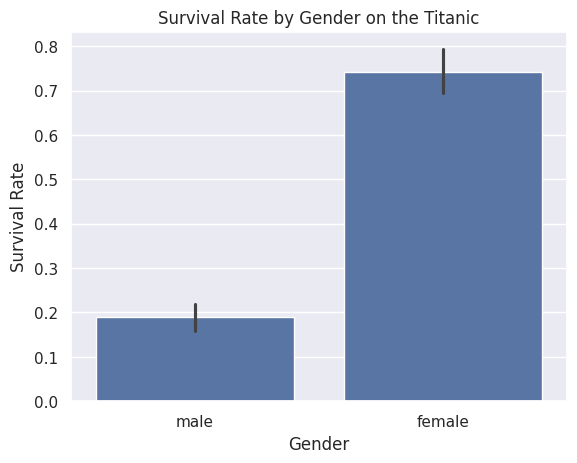

Percentage of females who survived:  74.20382165605095
Percentage of males who survived:  18.890814558058924


In [12]:
# Visualizing the sex feature
def plot_survival_by_sex(data):
    """
    Plots the survival rate by sex and prints the survival percentages for females and males.

    Parameters:
    data (DataFrame): A pandas DataFrame containing 'Sex' and 'Survived' columns.
    """
    sns.set(style="darkgrid")
    sns.barplot(x="Sex", y="Survived", data = data)
    plt.xlabel("Gender")
    plt.ylabel("Survival Rate")
    plt.title("Survival Rate by Gender on the Titanic")

    plt.show()
    female_survival_rate = data["Survived"][data["Sex"] == "female"].value_counts(normalize=True)[1] * 100
    print("Percentage of females who survived: ", female_survival_rate)
    male_survival_rate = data["Survived"][data["Sex"] == "male"].value_counts(normalize=True)[1] * 100
    print("Percentage of males who survived: ", male_survival_rate)
plot_survival_by_sex(train_df)

As predicted, females have a much higher chance of survival than males. The Sex feature is essential in our predictions.

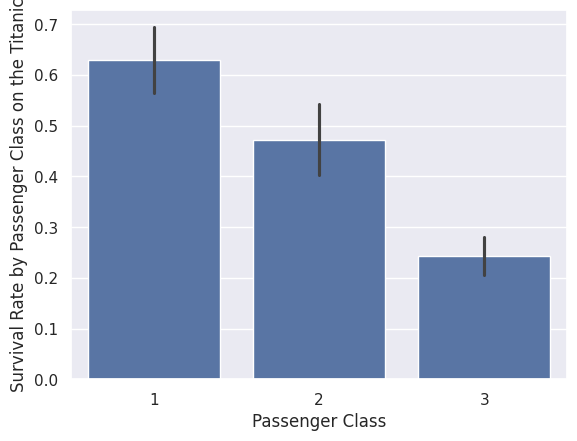

Percentage of Passengers by class = 1 who survived:  62.96296296296296
Percentage of Passengers by class = 2 who survived:  47.28260869565217
Percentage of Passengers by class = 3 who survived:  24.236252545824847


In [22]:
# Draw a bar plot of survival rate by Pclass
def plot_survival_by_pclass(data):
   """
   Takes a DataFrame containing Titanic passenger data,
   generates a bar plot of survival rates by Pclass, and prints the 
   percentages of passengers in each class who survived.
    
     Parameters:
    data (DataFrame): A pandas DataFrame containing the Titanic dataset.
   """
   sns.set(style="darkgrid")
   sns.barplot(x="Pclass", y = "Survived", data=data)
   plt.xlabel("Passenger Class")
   plt.ylabel("Survival Rate by Passenger Class on the Titanic")
   plt.show()
   for pclass in range(1,4):
       survival_rate = data["Survived"][data["Pclass"] == pclass].value_counts(normalize=True)[1] * 100
       print(f"Percentage of Passengers by class = {pclass} who survived: ", survival_rate)

# call the function with our train_df arg
plot_survival_by_pclass(train_df)

The survival rate of passengers in first class seemes to be higher than other classes.Ofcourse further analysis is required to determine why the data is skewed.

In [23]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

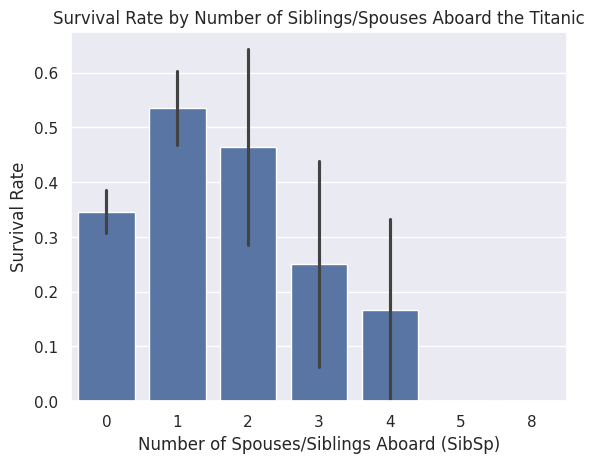

Percentage of SibSp = 0 who survived:  34.53947368421053
Percentage of SibSp = 1 who survived:  53.588516746411486
Percentage of SibSp = 2 who survived:  46.42857142857143


In [25]:
# visualize the SibSp feature
def plot_survival_by_sibsp(data):
    """
     This function takes a DataFrame containing Titanic passenger data,
    generates a bar plot of survival rates by SibSp (siblings/spouses aboard),
    and prints the percentages of passengers with 0, 1, and 2 siblings/spouses who survived.

    Parameters:
    data (DataFrame): A pandas DataFrame containing the Titanic dataset.
    """
    sns.set(style="darkgrid")
    sns.barplot(x="SibSp", y="Survived", data=data)
    plt.xlabel("Number of Spouses/Siblings Aboard (SibSp)")
    plt.ylabel("Survival Rate")
    plt.title("Survival Rate by Number of Siblings/Spouses Aboard the Titanic")
    plt.show()
    for sibsp in range(3):
        survival_rate = data["Survived"][data["SibSp"] == sibsp].value_counts(normalize=True)[1] * 100
        print(f"Percentage of SibSp = {sibsp} who survived: ", survival_rate)
plot_survival_by_sibsp(train_df)

In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)

In [26]:
# Parch Feature
